In [ ]:
import numpy as np
from PIL import Image
import os
#import tensorflow as tf

In [ ]:
## Fınd the paths of the txt and image folders, make a pair of them 

import glob

filesimg = glob.glob('C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri' + '/**/*.jpg', recursive=True)
filestxt = glob.glob('C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri' + '/**/*.txt', recursive=True)

zipped= zip(filesimg ,filestxt)

zippath=list(zipped)

In [ ]:
osn=os.path.basename(zippath[0][0])
osn

len (zippath)
zippath[378]

# osim=os.path.basename(zippath[idx][0])
# ostxt=os.path.basename(zippath[idx][1])

In [ ]:
def croplabeler(idx,zippath):
    
    osim=os.path.basename(zippath[idx][0])
    ostxt=os.path.basename(zippath[idx][1])
    
    img = Image.open(osim)
    width,height= img.width, img.height

    f= open(ostxt,"r")
    annots= f.read().splitlines()

    count=0
    imgs=[]
    label=[]
    for annot in annots:
        fields = annot.split(' ')
        label.append(fields[0])
    
        annot = list(map(float,annot.split(" ")))[1:]
        x,y,w,h= annot[0] * width ,annot[1] * height, annot[2] * width ,annot[3] * height
         
        tl_x,tl_y,bt_rx,bt_ry = x-(w/2), y-(h/2) , x+(w/2) , y+(h/2)
        cropped = img.crop((tl_x,tl_y,bt_rx,bt_ry))
        cropped.save("C:/Users/hakki.arkangil/Desktop/crops/" + str(idx)+ str(count) +".jpg", 'JPEG')
        #print("my position is : " + zippath[idx][0])
        imgs.append(cropped)  #sikinti 26 lik dondurukten sonra ustuen yaziyo arrayin
        count+=1
        
        
    return imgs,label
## takes multiple object image as input and outputs each object alone

In [5]:
imgbasket=[]
labelbasket=[]
for i in range (len(zippath)):
    imgs,labels=croplabeler(i,zippath)
    imgbasket.append(imgs)
    labelbasket.append(labels)

SystemError: tile cannot extend outside image

In [6]:
flat_list_img = []
for sublist in imgbasket:
    for item in sublist:
        flat_list_img.append(item)

In [7]:
flat_list_label = []
for sublist in labelbasket:
    for item in sublist:
        flat_list_label.append(item)

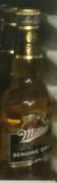

In [8]:
flat_list_img[-1]

In [9]:
flat_list_label[-1]

'36'

In [10]:
len(flat_list_img)

8251

In [11]:
len(flat_list_label)

8251

In [12]:
data = np.asarray(flat_list_img[313]) ## to understand what kind of images do we have, pixels and dimensions

In [13]:
data.shape

(201, 69, 3)

In [14]:
w,h = flat_list_img[313].width, flat_list_img[313].height

In [15]:
len(data[200]) ## 200 heightan 69 width rgb uc colorlu resim veriseti

69

In [16]:
data[200][1] #rgb formati renk degerlerini donduruyor

array([216, 204, 190], dtype=uint8)

In [17]:
########3
#########
#########                             ACTIVE   LEARNER            


import cv2
##

In [18]:
data = np.asarray(flat_list_img[313])               # test instance to be converted 1 dimension scale

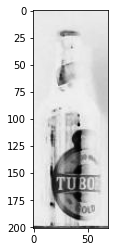

In [19]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

gray = cv2.cvtColor(np.float32(data), cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap=plt.cm.binary)

In [20]:
gray.shape                          # one dimension..

(201, 69)

In [21]:
a=cv2.resize(data,(64,200))          ### test instance to create standart data

In [22]:
flat_list_img_np=[]
for i in flat_list_img:                              ##convert images to numpy array 
    temp=np.asarray(i)
    flat_list_img_np.append(temp)

In [23]:
flat_list_img_g=[]
for i in flat_list_img_np:
    temp=cv2.cvtColor(np.float32(i), cv2.COLOR_RGB2GRAY)           # make the numpy array one dimensional
    flat_list_img_g.append(temp) 

In [24]:
### PIL images must be array
X=[]
for i in flat_list_img_g:
    a=cv2.resize(i,(50,200))
    X.append(a)
    
    
#### height ve weighleri tek arrayde mnist gibi alinmasi gerekiyor 8x8 = 64 gibi ve 3 channel 1 ch olmali

In [25]:
X_t=[]
for i in X:
    X_t.append(i.flatten())

In [26]:
Y=flat_list_label

In [27]:
print(len(X_t))             #succesfully paired.
print(len(Y))

8251
8251


In [28]:
Y = np.asarray(Y)

In [29]:
X_t = np.asarray(X_t)

In [30]:
type(X_t)

numpy.ndarray

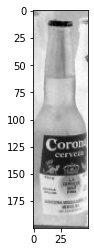

In [31]:
pixels5=X_t[75]

plt.imshow(pixels5.reshape(200, 50),cmap=plt.cm.binary)                     #we are ready for training.

In [32]:
#normalization...


def normalize2(feature): # normalization to 0-1 range
    min_feat = np.min(feature)
    max_feat = np.max(feature)
    feature = (feature - min_feat) / (max_feat-min_feat)
    return feature



In [33]:
X_t = normalize2(X_t)             #expect better accuracy with normalized dataset

In [34]:
X_t = np.asarray(X_t)

In [35]:
type(X_t)

numpy.ndarray

In [36]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [37]:
n_initial = 500

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)

In [39]:
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)


In [40]:
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [41]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [42]:
n_queries = 20

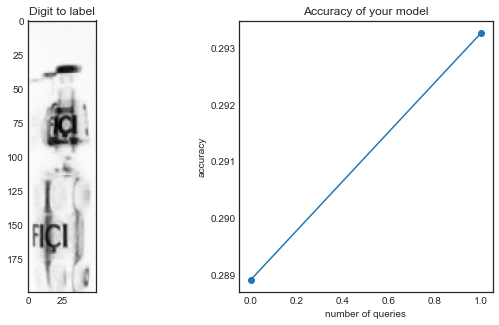

Which digit is this?


KeyboardInterrupt: Interrupted by user

In [44]:
accuracy_scores = [learner.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(200,50))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

In [ ]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(4, 6))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()